In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from helper import convert_to_time

In [3]:
np.random.seed(1)

# Default values
filename = 'TOTAL_KSI_6386614326836635957.csv'
input_directory = "../data/"
output_directory = "./output/"

ksi_df = pd.read_csv(f'{input_directory}{filename}')


In [4]:
print(ksi_df.describe())


           OBJECTID         INDEX        ACCNUM          TIME      LATITUDE  \
count  18957.000000  1.895700e+04  1.402700e+04  18957.000000  18957.000000   
mean    9479.000000  3.994181e+07  5.576714e+08   1364.956428     43.710299   
std     5472.558862  3.749731e+07  1.180026e+09    631.310388      0.056294   
min        1.000000  3.363207e+06  2.530100e+04      0.000000     43.589678   
25%     4740.000000  5.408154e+06  1.034561e+06    924.000000     43.661727   
50%     9479.000000  7.820656e+06  1.220029e+06   1450.000000     43.702346   
75%    14218.000000  8.092292e+07  1.386958e+06   1852.000000     43.755945   
max    18957.000000  8.180752e+07  4.008024e+09   2359.000000     43.855445   

          LONGITUDE    FATAL_NO              x             y  
count  18957.000000  870.000000   18957.000000  1.895700e+04  
mean     -79.396490   28.752874  629181.568576  4.840951e+06  
std        0.104484   17.657001    8364.337712  6.324585e+03  
min      -79.638390    1.000000  609

In [5]:
print(ksi_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18957 entries, 0 to 18956
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           18957 non-null  int64  
 1   INDEX              18957 non-null  int64  
 2   ACCNUM             14027 non-null  float64
 3   DATE               18957 non-null  object 
 4   TIME               18957 non-null  int64  
 5   STREET1            18957 non-null  object 
 6   STREET2            17251 non-null  object 
 7   OFFSET             3820 non-null   object 
 8   ROAD_CLASS         18471 non-null  object 
 9   DISTRICT           18728 non-null  object 
 10  LATITUDE           18957 non-null  float64
 11  LONGITUDE          18957 non-null  float64
 12  ACCLOC             13501 non-null  object 
 13  TRAFFCTL           18882 non-null  object 
 14  VISIBILITY         18933 non-null  object 
 15  LIGHT              18953 non-null  object 
 16  RDSFCOND           189

In [6]:
print(ksi_df.isnull().sum())

OBJECTID                 0
INDEX                    0
ACCNUM                4930
DATE                     0
TIME                     0
STREET1                  0
STREET2               1706
OFFSET               15137
ROAD_CLASS             486
DISTRICT               229
LATITUDE                 0
LONGITUDE                0
ACCLOC                5456
TRAFFCTL                75
VISIBILITY              24
LIGHT                    4
RDSFCOND                29
ACCLASS                  1
IMPACTYPE               27
INVTYPE                 16
INVAGE                   0
INJURY                8897
FATAL_NO             18087
INITDIR               5277
VEHTYPE               3487
MANOEUVER             7953
DRIVACT               9289
DRIVCOND              9291
PEDTYPE              15728
PEDACT               15730
PEDCOND              15711
CYCLISTYPE           18152
CYCACT               18155
CYCCOND              18157
PEDESTRIAN           11269
CYCLIST              16971
AUTOMOBILE            1727
M

In [7]:
ksi_df.head(3)

,OBJECTID,INDEX,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,x,y
0,1,3389067,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
1,2,3389068,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06
2,3,3389069,893184.0,1/1/2006 10:00:00 AM,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,635468.3685,4.839881e+06


In [8]:
# Drop fields
dropped_fields = [
    'INDEX',
    'OBJECTID',
    'ACCNUM',
    'STREET1',
    'STREET2',
    'DISTRICT',
    'OFFSET',
    'INITDIR',
    'FATAL_NO',
    'HOOD_158',
    'HOOD_140',
    'NEIGHBOURHOOD_140',
    'DIVISION',
    'x',
    'y',
]

ksi_df.drop(dropped_fields, axis=1, inplace=True)
ksi_df.dropna(subset=['ACCLASS'], inplace=True)

In [9]:
# Fill in empty fields
boolean_columns = [
    'PEDESTRIAN',
    'CYCLIST',
    'AUTOMOBILE',
    'MOTORCYCLE',
    'TRUCK',
    'TRSN_CITY_VEH',
    'EMERG_VEH',
    'PASSENGER',
    'SPEEDING',
    'AG_DRIV',
    'REDLIGHT',
    'ALCOHOL',
    'DISABILITY'
]

ksi_df[boolean_columns] = ksi_df[boolean_columns].fillna("No")

In [10]:
ksi_df['DATE'] = pd.to_datetime(ksi_df['DATE']).dt.strftime('%Y-%m') #pd.to_datetime(ksi_df['DATE']).dt.date
ksi_df['TIME'] = ksi_df['TIME'].apply(convert_to_time)
ksi_df['TIME'] = pd.to_datetime(ksi_df['TIME']).dt.hour
ksi_df['ROAD_CLASS'] = ksi_df['ROAD_CLASS'].str.replace(r'MAJOR ARTERIAL ', 'MAJOR ARTERIAL', regex=False)

/var/folders/gg/llfmzrv17klb_smsmrvhnkzc0000gn/T/ipykernel_97631/1009667405.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ksi_df['TIME'] = pd.to_datetime(ksi_df['TIME']).dt.hour


In [11]:
ksi_df['VEHTYPE'] = np.where((ksi_df['INVTYPE'] == 'Pedestrian') & (ksi_df['VEHTYPE'] != '') , 'Other', ksi_df['INVTYPE'])

In [12]:
ksi_df['VEHTYPE'] = np.where((ksi_df['INVTYPE'] == 'Passenger') & (ksi_df['VEHTYPE'] != '') , 'Other', ksi_df['INVTYPE'])

In [13]:
ksi_df.head(100)

,DATE,TIME,ROAD_CLASS,LATITUDE,LONGITUDE,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,...,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,NEIGHBOURHOOD_158
0,2006-01,2,Major Arterial,43.699595,-79.318797,Intersection Related,No Control,Clear,Dark,Wet,...,No,No,No,Yes,Yes,Yes,No,Yes,No,Woodbine-Lumsden
1,2006-01,2,Major Arterial,43.699595,-79.318797,Intersection Related,No Control,Clear,Dark,Wet,...,No,No,No,Yes,Yes,Yes,No,Yes,No,Woodbine-Lumsden
2,2006-01,2,Major Arterial,43.699595,-79.318797,Intersection Related,No Control,Clear,Dark,Wet,...,No,No,No,Yes,Yes,Yes,No,Yes,No,Woodbine-Lumsden
3,2006-01,2,Major Arterial,43.699595,-79.318797,Intersection Related,No Control,Clear,Dark,Wet,...,No,No,No,Yes,Yes,Yes,No,Yes,No,Woodbine-Lumsden
4,2006-01,2,Major Arterial,43.699595,-79.318797,Intersection Related,No Control,Clear,Dark,Wet,...,No,No,No,Yes,Yes,Yes,No,Yes,No,Woodbine-Lumsden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2006-02,14,Major Arterial,43.655845,-79.399190,At Intersection,Traffic Signal,Clear,Daylight,Dry,...,No,Yes,No,Yes,No,No,No,No,No,Kensington-Chinatown
96,2006-02,14,Major Arterial,43.655845,-79.399190,At Intersection,Traffic Signal,Clear,Daylight,Dry,...,No,Yes,No,Yes,No,No,No,No,No,Kensington-Chinatown
97,2006-02,14,Major Arterial,43.655845,-79.399190,At Intersection,Traffic Signal,Clear,Daylight,Dry,...,No,Yes,No,Yes,No,No,No,No,No,Kensington-Chinatown
98,2006-02,7,Major Arterial,43.800645,-79.307090,At Intersection,Traffic Signal,Rain,Daylight,Wet,...,No,No,No,No,No,Yes,No,No,No,East L'Amoreaux


In [14]:
other_column =  [
    'ROAD_CLASS',
    'ACCLOC',
    'VISIBILITY',
    'LIGHT',
    'RDSFCOND',
    'IMPACTYPE',
    'INVTYPE',
    'DRIVACT',
    'PEDACT',
    'CYCACT',
    'MANOEUVER',
    'DRIVCOND',
    'PEDCOND',
    'CYCLISTYPE',
    'CYCCOND',
    'TRAFFCTL',
    'INJURY'
]

ksi_df[other_column] = ksi_df[other_column].fillna("Other")
ksi_df['PEDTYPE'] = ksi_df['PEDTYPE'].fillna("OTHER / UNDEFINED")

In [15]:
categorical_columns = ksi_df.select_dtypes(include=[object, 'category']).columns.tolist()
ksi_df[categorical_columns] = ksi_df[categorical_columns].apply(lambda col: col.str.upper())
for x in categorical_columns:
    print(f"\nUnique values in column {x}:")
    print(ksi_df[x].unique())


Unique values in column DATE:
['2006-01' '2006-02' '2006-03' '2006-04' '2006-05' '2006-06' '2006-07'
 '2006-08' '2006-09' '2006-10' '2006-11' '2006-12' '2007-01' '2007-02'
 '2007-03' '2007-04' '2007-05' '2007-06' '2007-07' '2007-08' '2007-09'
 '2007-10' '2007-11' '2007-12' '2008-01' '2008-02' '2008-03' '2008-04'
 '2008-05' '2008-06' '2008-07' '2008-08' '2008-09' '2008-10' '2008-11'
 '2008-12' '2009-01' '2009-02' '2009-03' '2009-04' '2009-05' '2009-06'
 '2009-07' '2009-08' '2009-09' '2009-10' '2009-11' '2009-12' '2010-01'
 '2010-02' '2010-03' '2010-04' '2010-05' '2010-06' '2010-07' '2010-08'
 '2010-09' '2010-10' '2010-11' '2010-12' '2011-01' '2011-02' '2011-03'
 '2011-04' '2011-05' '2011-06' '2011-07' '2011-08' '2011-09' '2011-10'
 '2011-11' '2011-12' '2012-01' '2012-02' '2012-03' '2012-04' '2012-05'
 '2012-06' '2012-07' '2012-08' '2012-09' '2012-10' '2012-11' '2012-12'
 '2013-01' '2013-02' '2013-03' '2013-04' '2013-05' '2013-06' '2013-07'
 '2013-08' '2013-09' '2013-10' '2013-11' '2013

In [16]:
cat = categorical_columns.copy()
cat.remove("DATE")
cat.remove("NEIGHBOURHOOD_158")

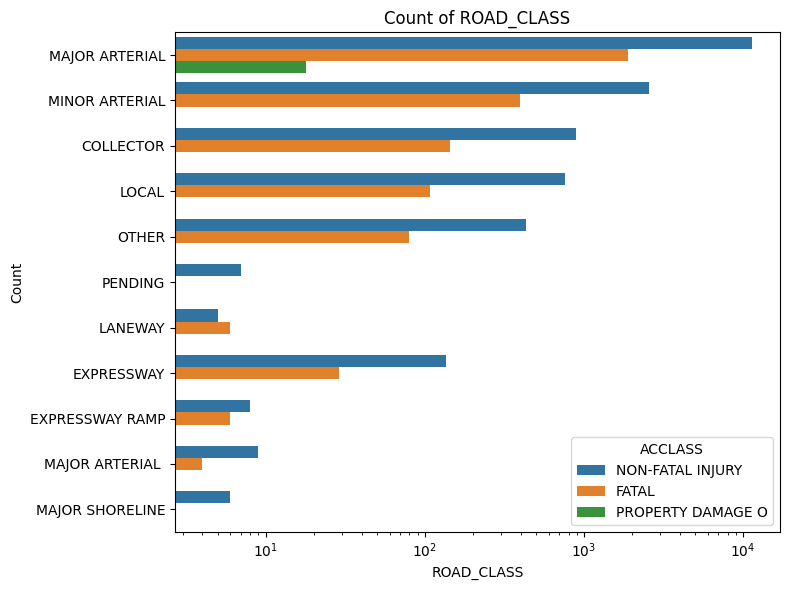

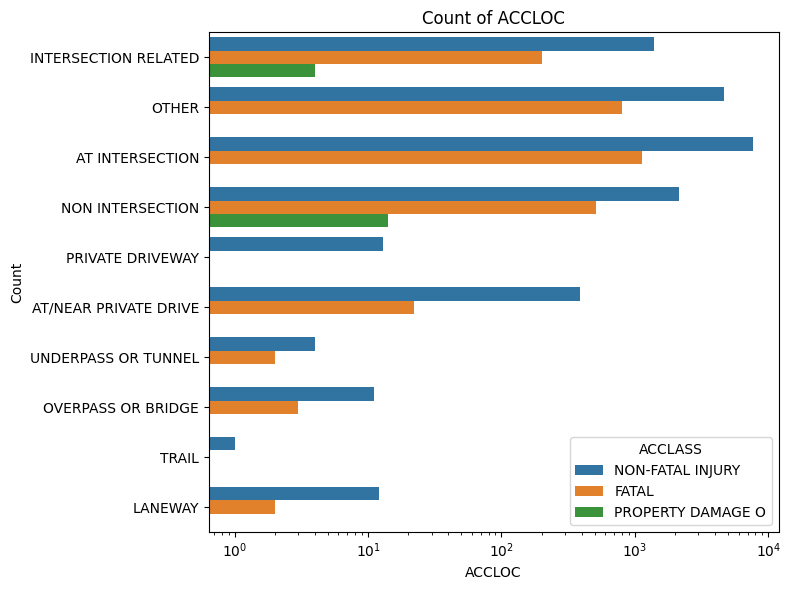

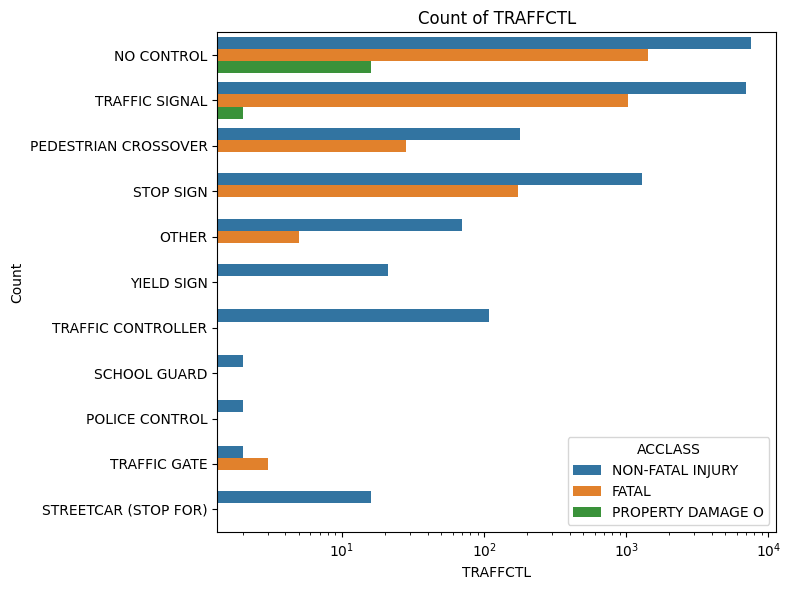

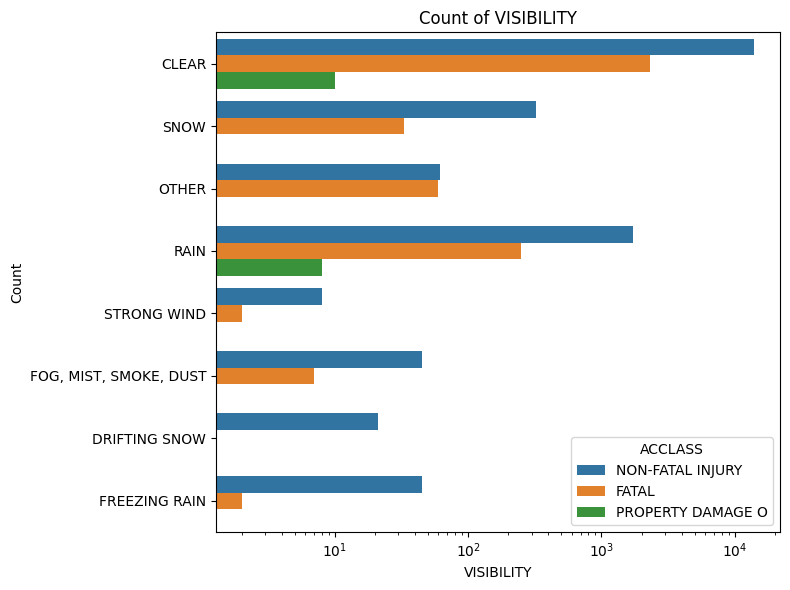

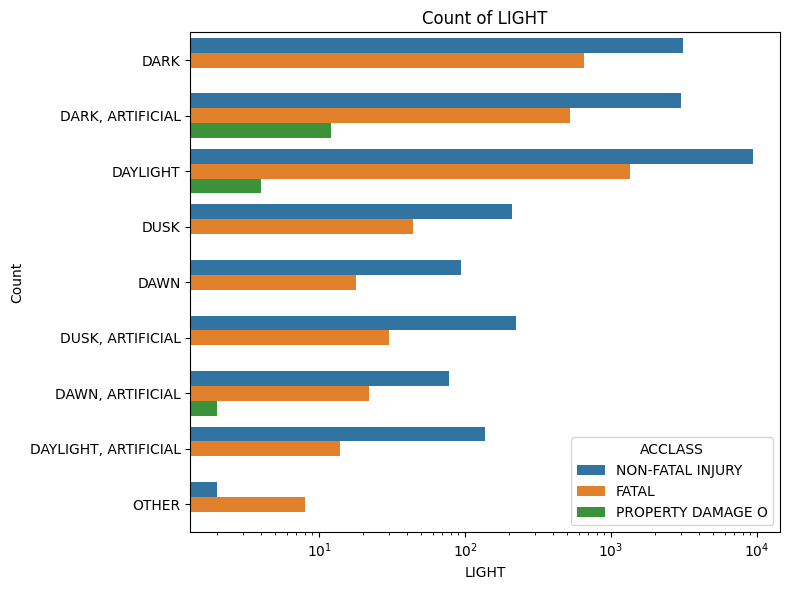

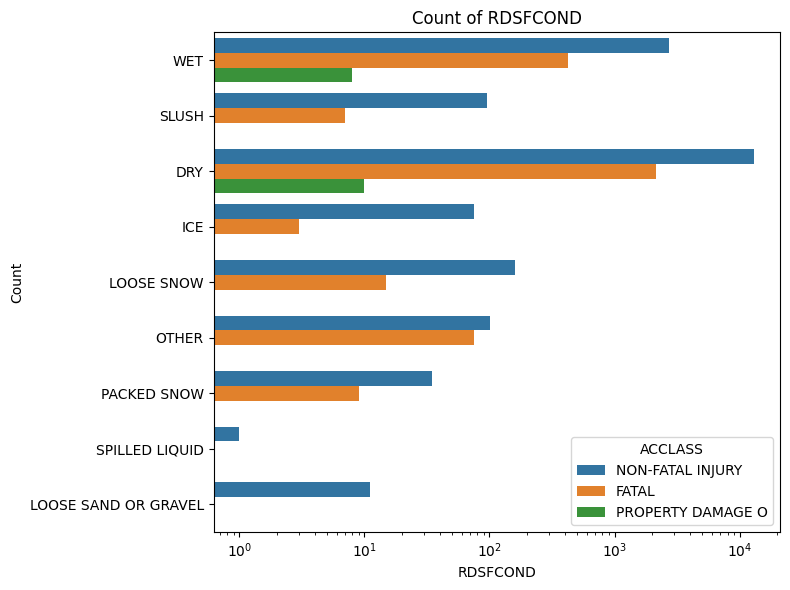

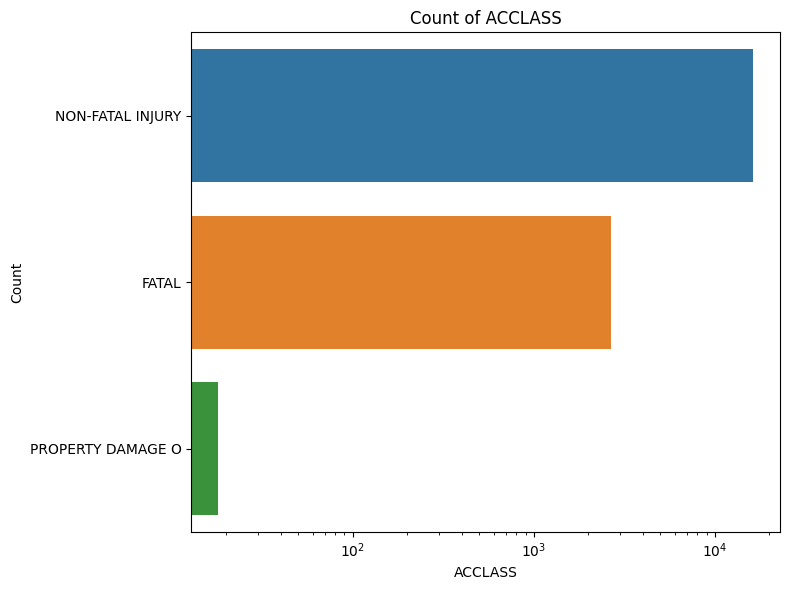

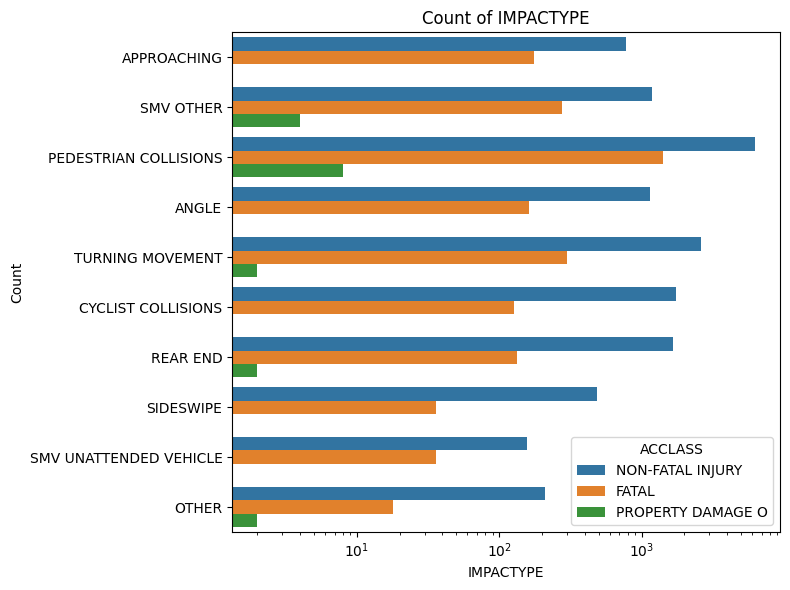

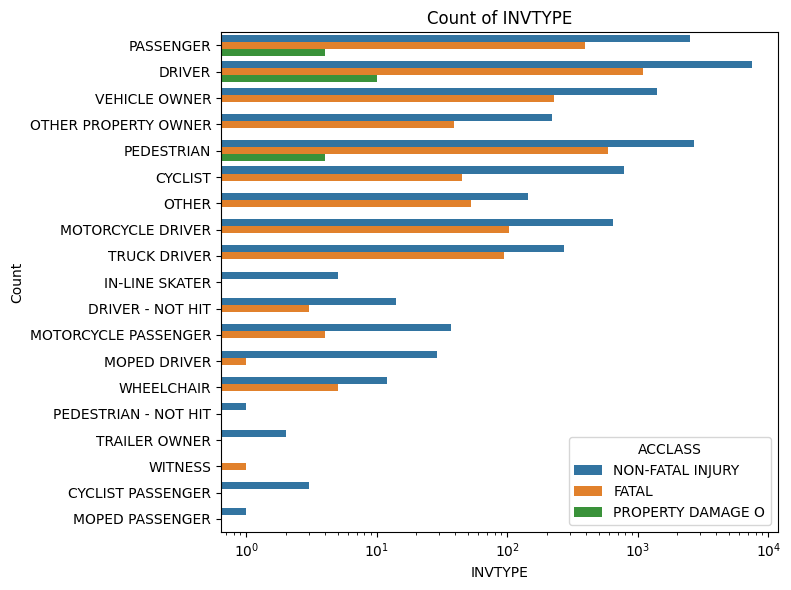

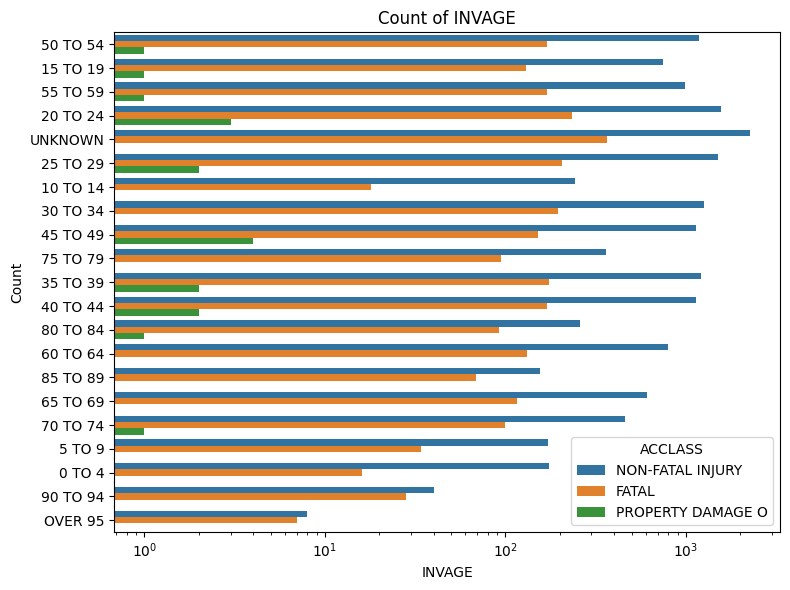

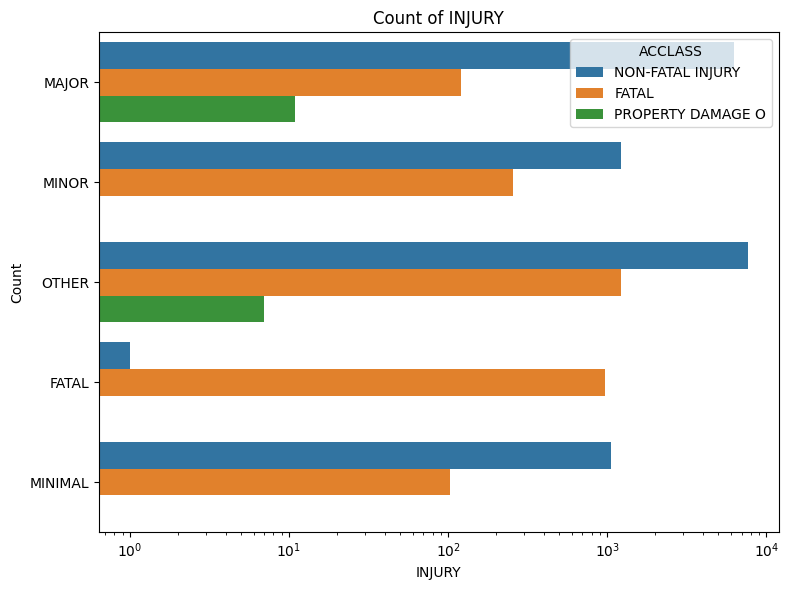

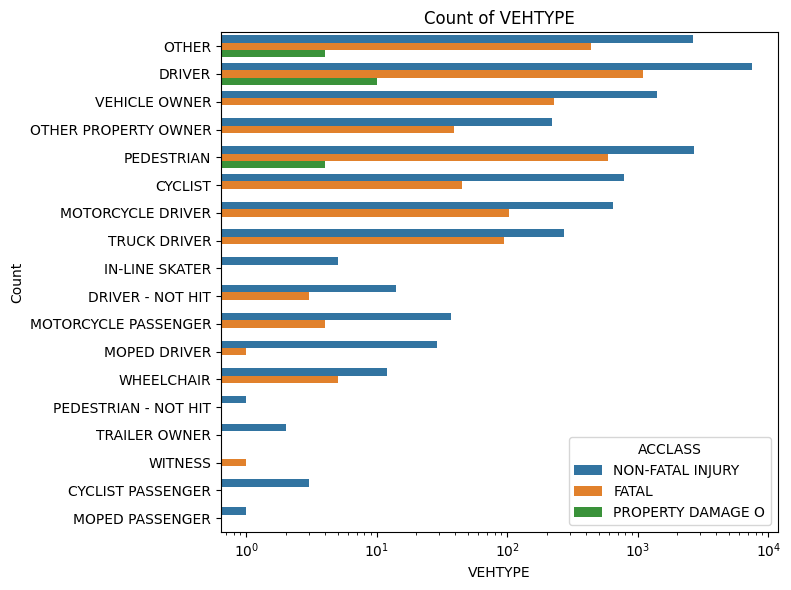

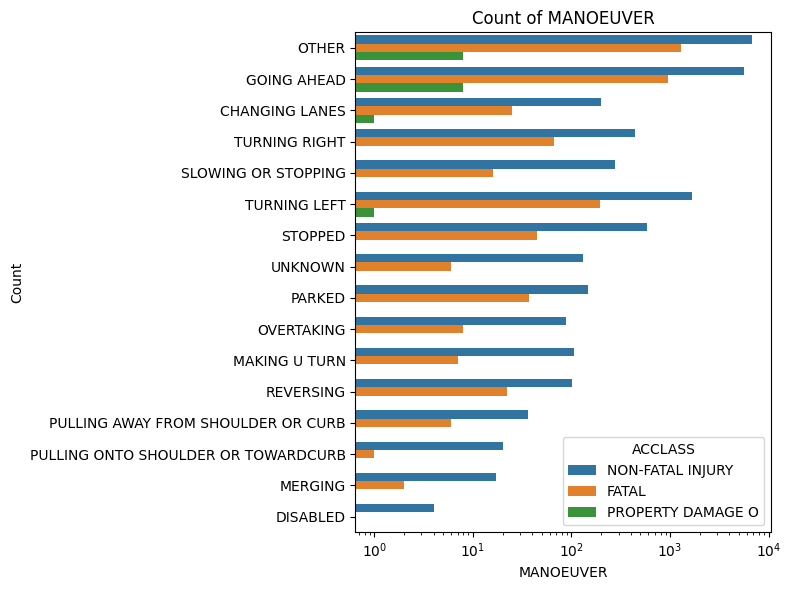

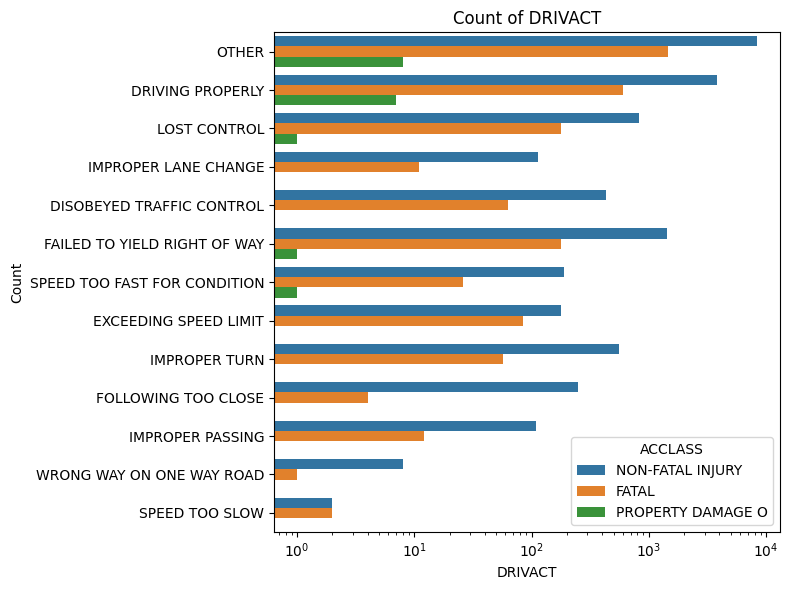

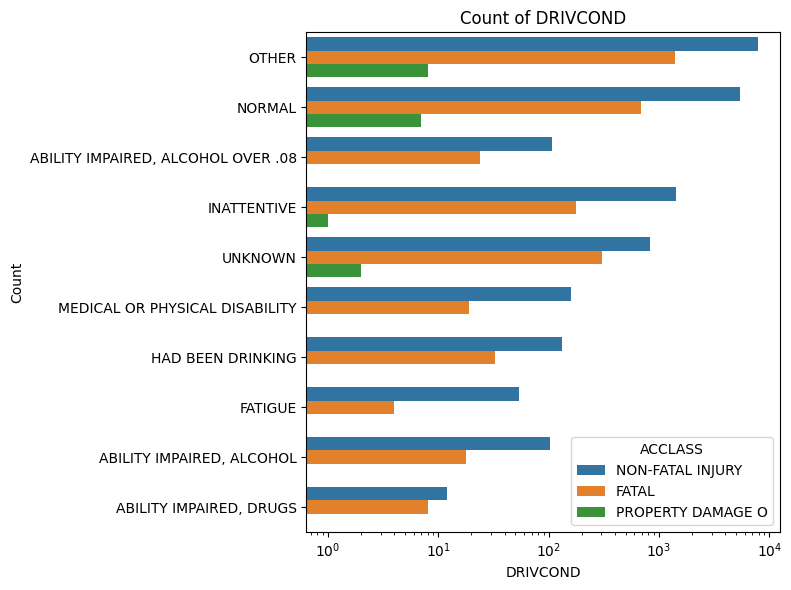

/var/folders/gg/llfmzrv17klb_smsmrvhnkzc0000gn/T/ipykernel_97631/2954389664.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


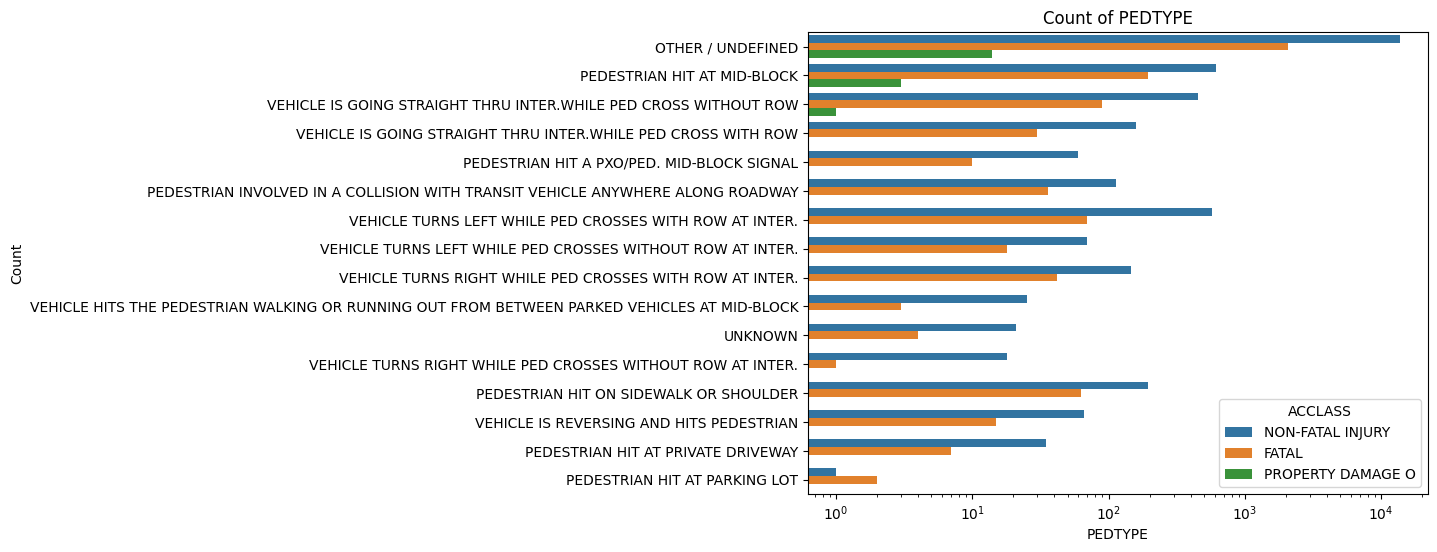

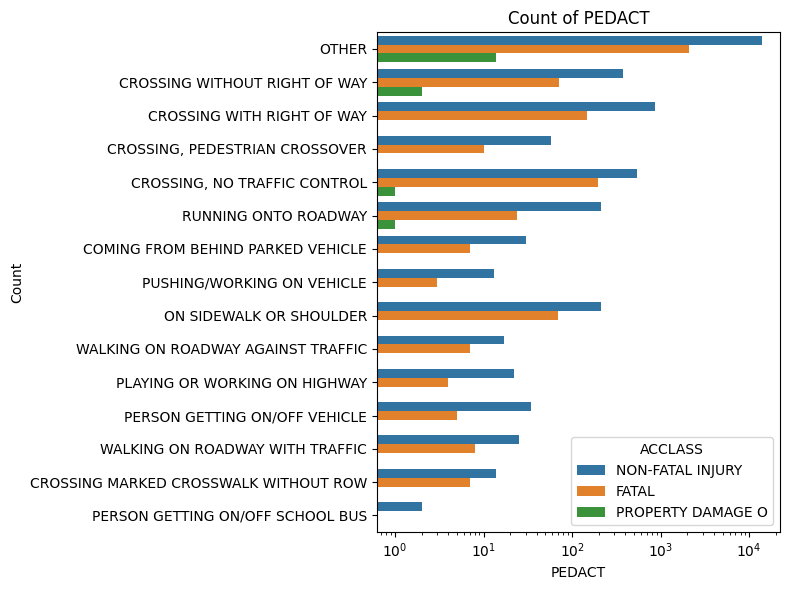

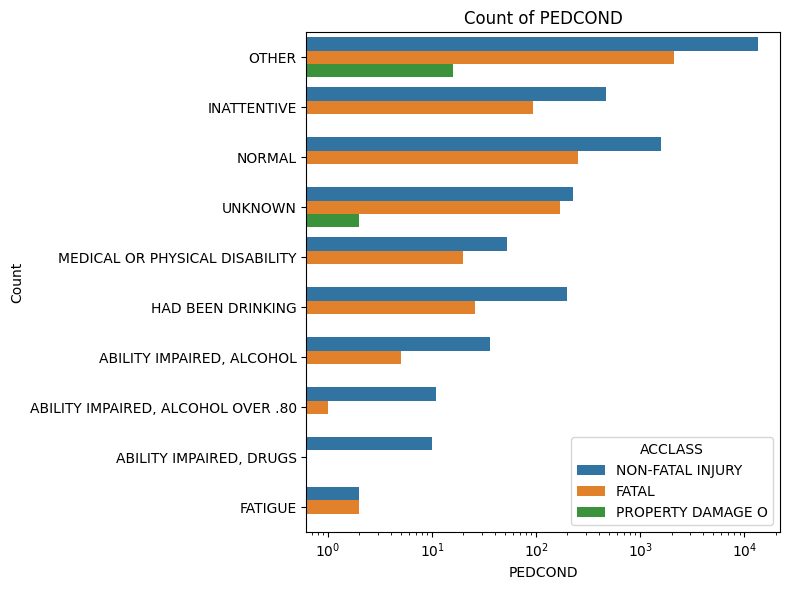

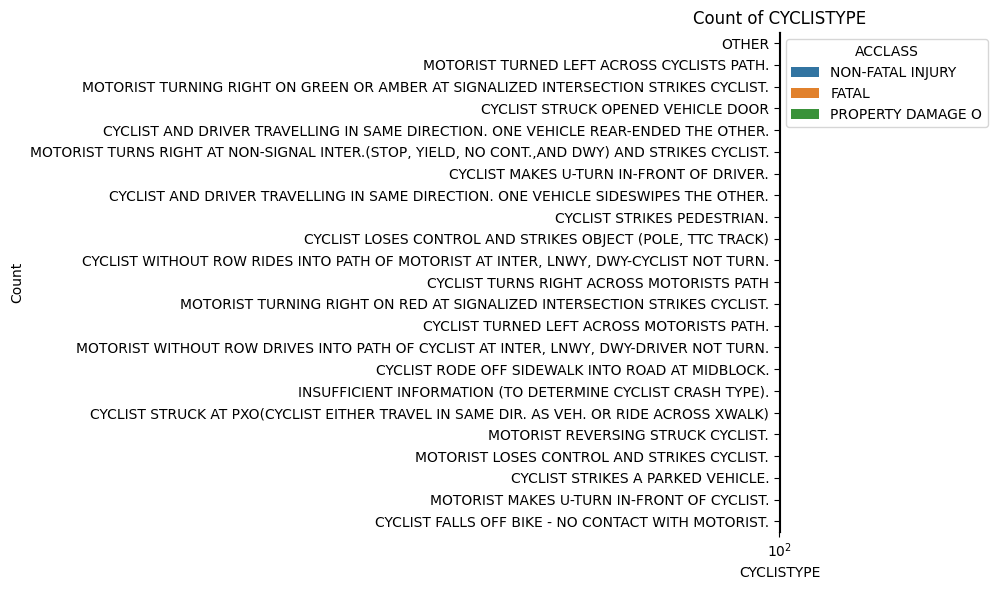

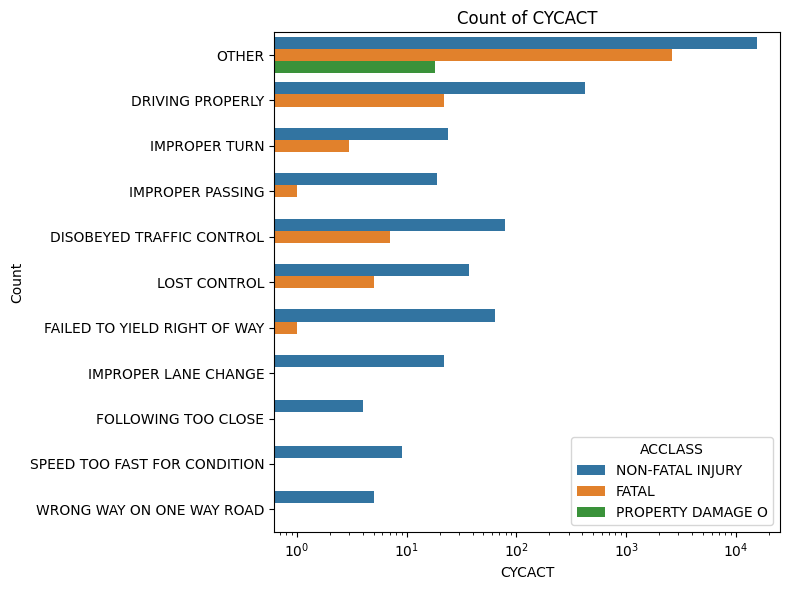

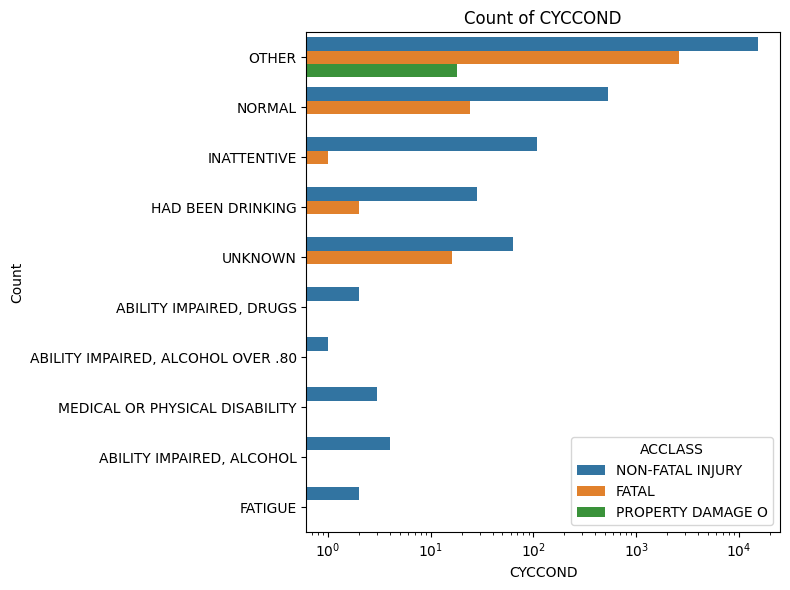

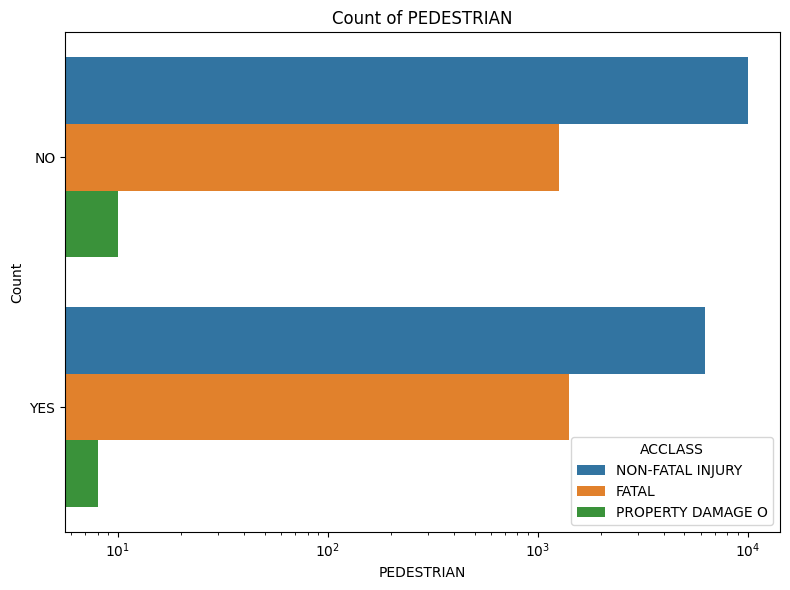

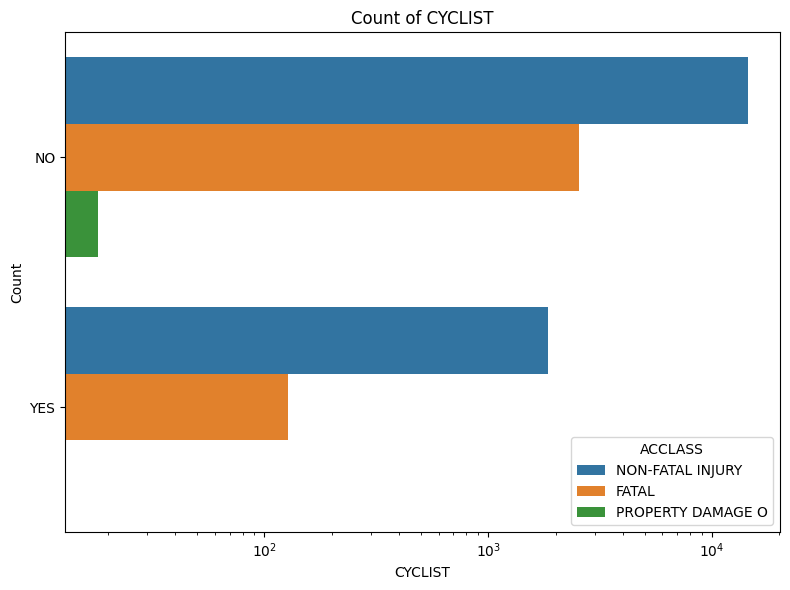

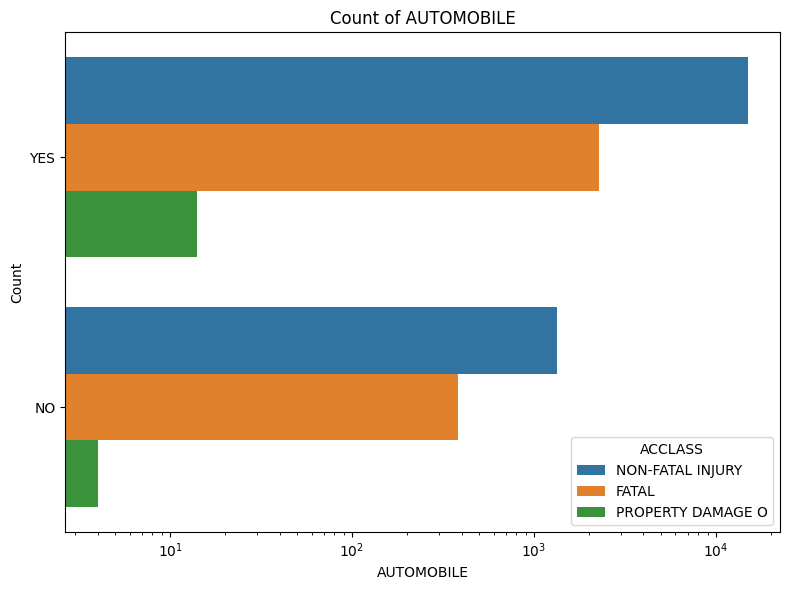

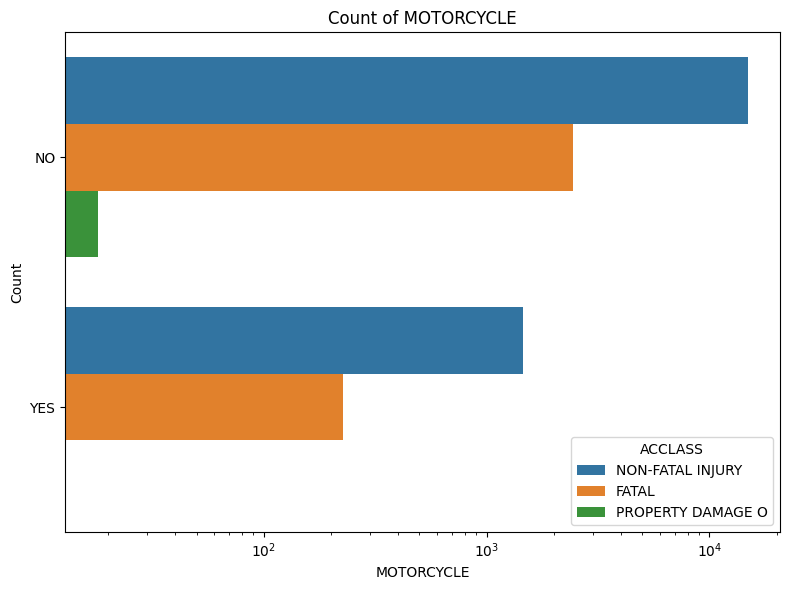

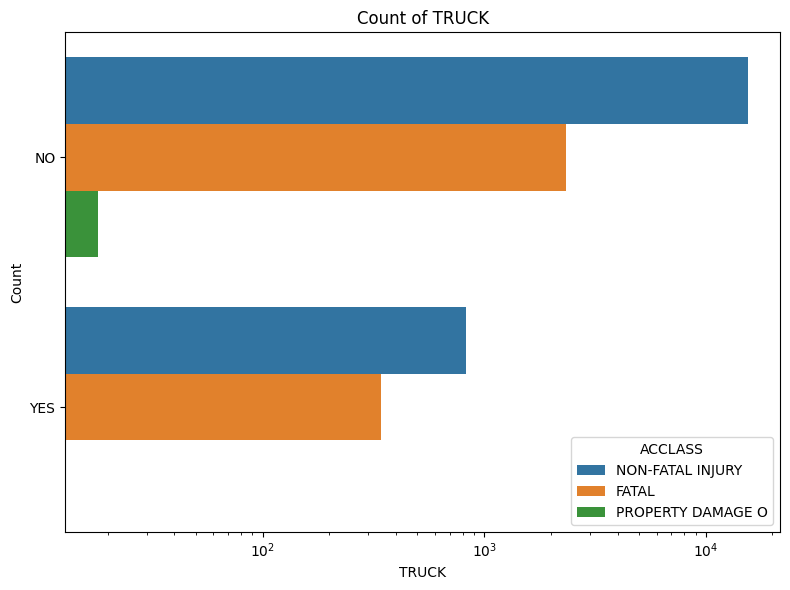

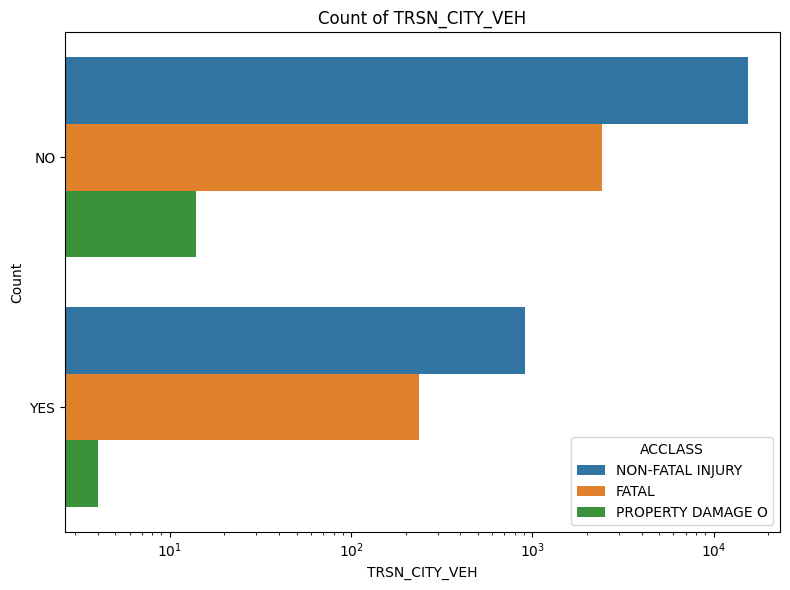

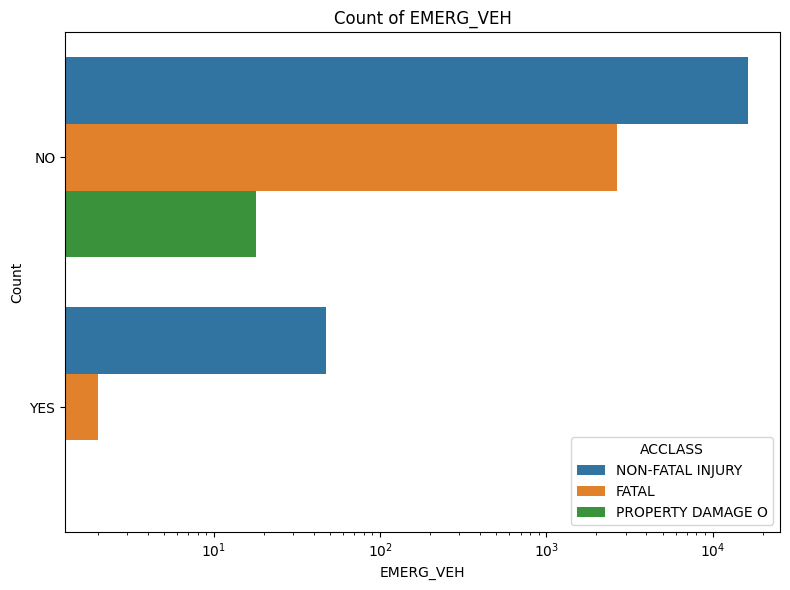

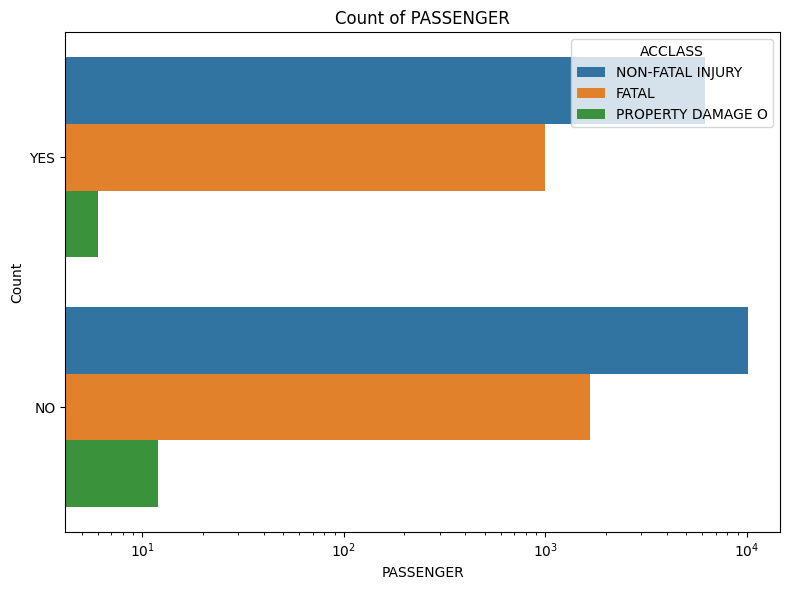

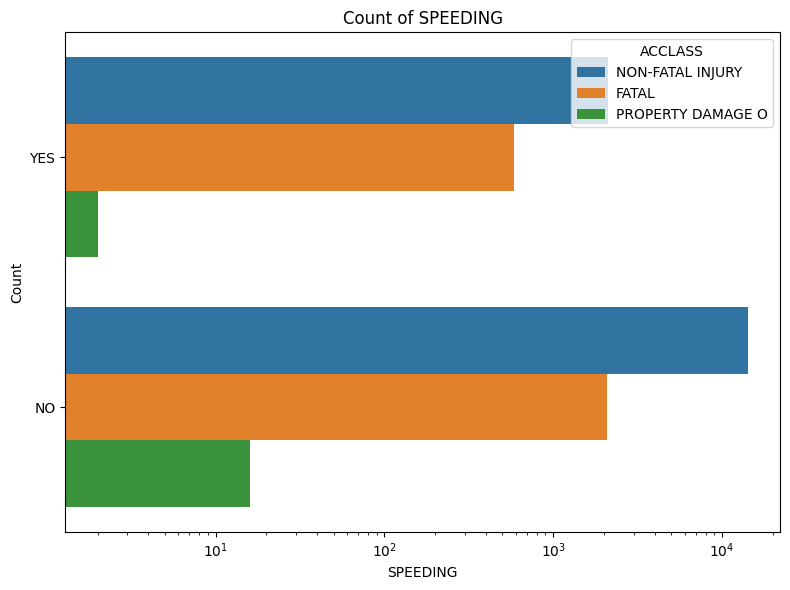

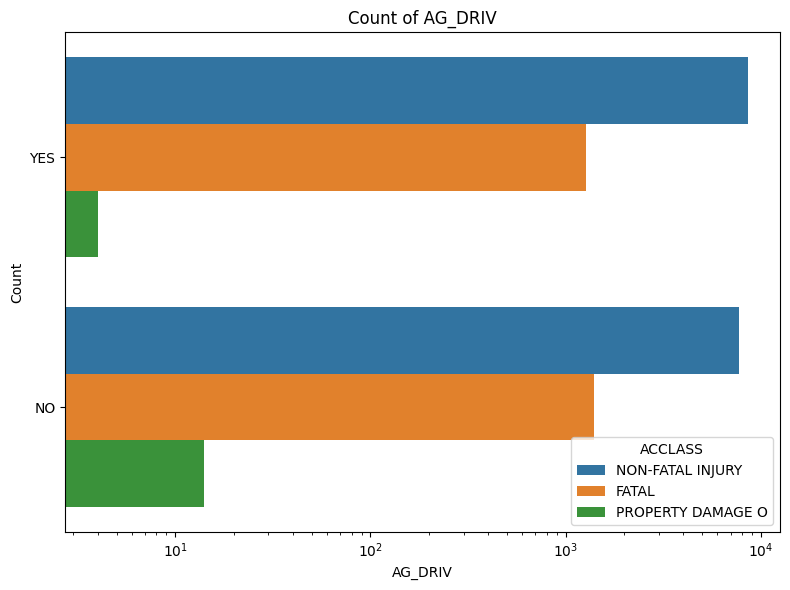

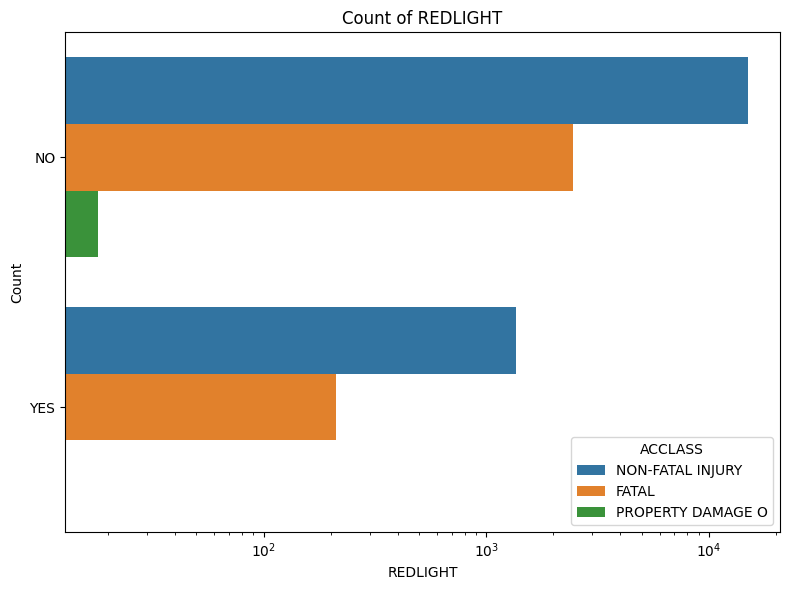

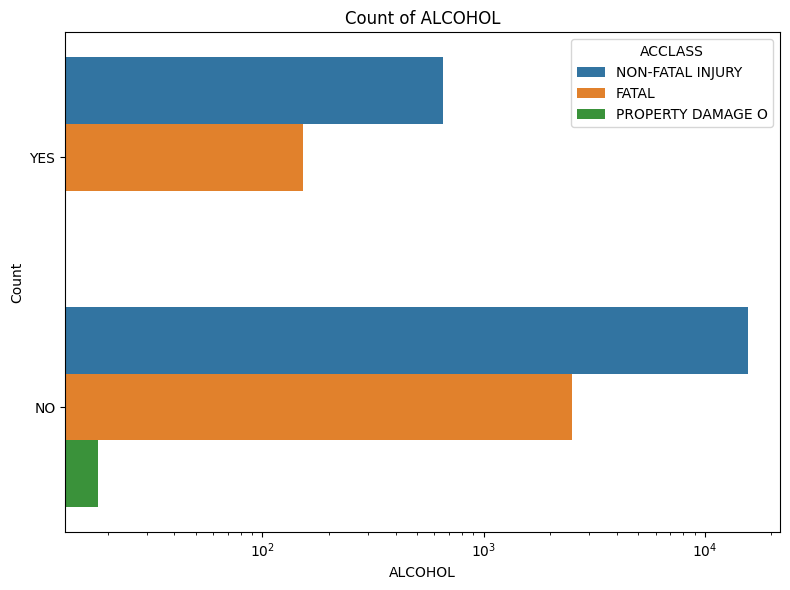

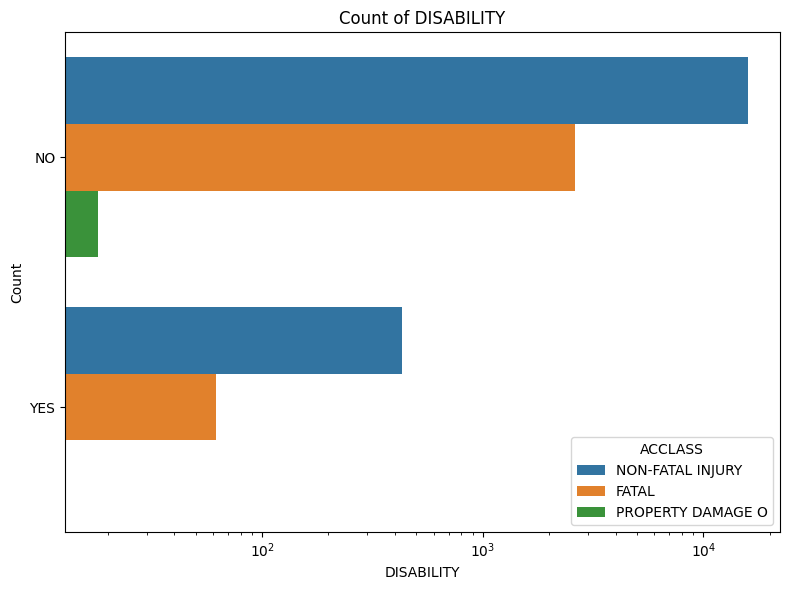

In [20]:
for column in cat:
    plt.figure(figsize=(8, 6))
    sns.countplot(ksi_df, y=column, hue='ACCLASS')
    #sns.swarmplot(ksi_df, x=column, hue="ACCLASS")
    plt.title(f"Count of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xscale('log')
    #plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()